In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import keras
import csv
from keras.preprocessing.text import Tokenizer
from os.path import expanduser
import seaborn as sns

from nltk.corpus import stopwords
stops = stopwords.words('english')
pd.set_option('max_colwidth',200)

MAX_NB_WORDS = 80000
quora_10k = 'samples/training_10k.tsv'
quora_50k = 'samples/training_50k.tsv'
train = 'Quora_question_pair_partition/train.tsv'
dev = 'Quora_question_pair_partition/dev.tsv'
test = 'Quora_question_pair_partition/test.tsv'
full_q = 'full.csv'
ask_ubuntu_train = 'a_train.tsv'
ask_ubuntu_dev = 'a_dev.tsv'
ask_ubuntu_test = 'a_test.tsv'
ask_ubuntu_15 = 'samples/ask_15k.tsv'

KERAS_DATASETS_DIR = expanduser('~/.keras/datasets/')
GLOVE_FILE = 'glove.840B.300d.txt'
FASTTEXT_FILE = '/Users/andrada/Thesis_notebooks/wiki-news-300d-1M.vec'
EMBEDDING_DIM = 300

In [169]:
df_5k = pd.read_table('samples/training_5k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
df_10k = pd.read_table('samples/training_10k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
df_15k = pd.read_table('samples/training_15k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
df_20k = pd.read_table('samples/training_20k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
df_25k = pd.read_table('samples/training_25k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
df_30k = pd.read_table('samples/training_30k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
df_50k = pd.read_table('samples/training_50k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
df_train = pd.read_table('Quora_question_pair_partition/train.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
df_dev = pd.read_table('Quora_question_pair_partition/dev.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
df_test = pd.read_table('Quora_question_pair_partition/test.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
full = pd.read_table('full.csv', sep=',', encoding='utf-8')

In [188]:
asku_train = pd.read_table('new_train.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'qid'])
asku_train2 = pd.read_table('a_train.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'qid'])
asku_dev = pd.read_table('a_dev.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'qid'])
asku_test = pd.read_table('a_test.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'qid'])
ask_5k = pd.read_table('samples/ask_5k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
ask_10k = pd.read_table('samples/ask_10k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
ask_15k = pd.read_table('samples/ask_15k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])

In [91]:
def read_full_dataset(file):

    print("Processing quora question pairs file")
    question1 = []
    question2 = []
    is_duplicate = []
    with open(file, encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            question1.append(row[1])
            question2.append(row[2])
#             is_duplicate.append(row[0])
    print('Question pairs from %s: %d' % (file, len(question1)))

    return question1, question2, is_duplicate

def tokenize_data(question1, question2):
    questions = question1 + question2
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(questions)
    word_index = tokenizer.word_index
    print("Words in index: %d" % len(word_index))
    return word_index

def compute_overlap(df):
    df['q1_lemma'] = df['question1'].apply(lemmatize_text)
    df['q2_lemma'] = df['question2'].apply(lemmatize_text)
    df['word_overlap'] = df.apply( word_match_share, axis=1, raw=True)
    print(df['word_overlap'].loc[df['is_duplicate']==1].mean())
    print(df['word_overlap'].loc[df['is_duplicate']==0].mean())
    print(df['word_overlap'].mean())
    
def get_counts(data):
    test_qs = pd.Series(data['question1'].tolist() + data['question2'].tolist()).astype(str)
    
    avgchar = np.mean(test_qs.apply(len))
    avgword = np.mean(test_qs.apply(lambda x: len(x.split(' '))))
    stopw = np.mean(test_qs.apply(lambda x: len([x for x in x.split() if x in stops])))

    print("Pairs of questions: {}".format(data[data.columns[0]].count()))
    print("Number of duplicates {}%".format(round(data[data.columns[0]].mean()*100, 2)))
    print('Average number of characters: {:.2f}'.format(avgchar))
    print('Average number of words: {:.2f}'.format(avgword))
    print('Average number of stopword: {:.2f} \n'.format(stopw))

def analyze_samples(df, file):
    compute_overlap(df)
    get_counts(df)
    q1, q2, _ = read_full_dataset(file)
    tokenize_data(q1, q2)

In [92]:
df_20k.dropna(inplace=True)
asku_train.count()
full.dropna(inplace=True)

In [ ]:
analyze_samples(full, 'full.csv')

In [33]:
ask_15k = pd.read_table('samples/ask_15k.tsv', sep='\t', encoding='utf-8',
                     names=['is_duplicate','question1', 'question2', 'id'])
qs_ask_15 = pd.Series(ask_15k['question1'].tolist() + ask_15k['question2'].tolist()).astype(str)
print(qs_ask_15.nunique())

ask_15k['q1_lemma'] = ask_15k['question1'].apply(lemmatize_text)
ask_15k['q2_lemma'] = ask_15k['question2'].apply(lemmatize_text)
ask_15k['word_overlap'] = ask_15k.apply( word_match_share, axis=1, raw=True)

24979


In [54]:
asku_test[asku_test['qid'] == 6]

,is_duplicate,question1,question2,qid
6,0,mupen64plus 64 bit version from repo too slow i using ubuntu 12.04 lts 64 bit with unity 2d using compiz on a laptop dual core amd 64 bit turion 2.1ghz with a ati radeon x1250 i did not install th...,how do you remove empty box on kde desktop i not exactly sure what this empty box on my desktop is however it been there pretty much from the beginning i running kubuntu 12.04 the empty box was n'...,6


Text(0,0.5,'Probability')

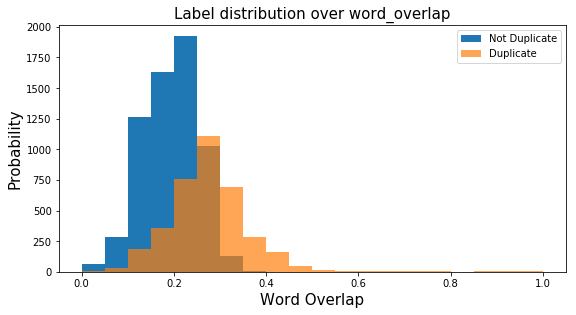

In [31]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.hist(ask_15k['word_overlap'].loc[ask_15k['is_duplicate'] == 0], range=[0,1], bins=20, label='Not Duplicate')
plt.hist(ask_15k['word_overlap'].loc[ask_15k['is_duplicate'] == 1], range=[0,1], bins=20, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_overlap', fontsize=15)
plt.xlabel('Word Overlap', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [26]:
asku_train['q1_lemma'] = asku_train['question1'].apply(lemmatize_text)
asku_train['q2_lemma'] = asku_train['question2'].apply(lemmatize_text)
asku_train['word_overlap'] = asku_train.apply( word_match_share, axis=1, raw=True)

Text(0,0.5,'Probability')

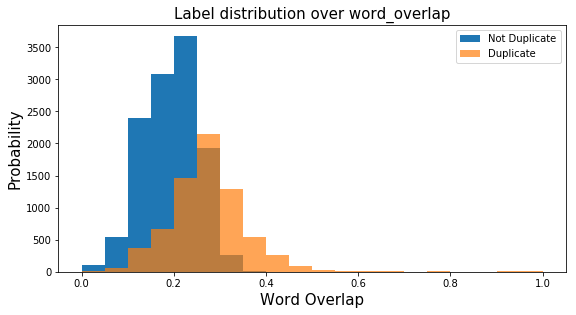

In [27]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.hist(asku_train['word_overlap'].loc[asku_train['is_duplicate'] == 0], range=[0,1], bins=20, label='Not Duplicate')
plt.hist(asku_train['word_overlap'].loc[asku_train['is_duplicate'] == 1], range=[0,1], bins=20, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_overlap', fontsize=15)
plt.xlabel('Word Overlap', fontsize=15)
plt.ylabel('Probability', fontsize=15)

Text(0,0.5,'Number of pairs of questions')

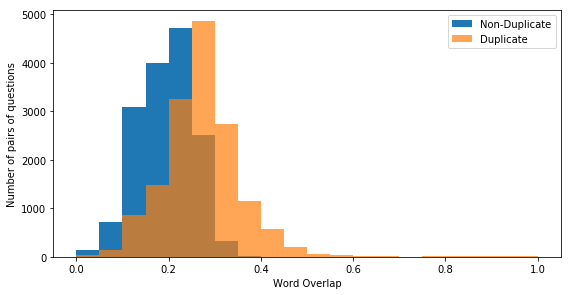

In [203]:
# asku_full = pd.concat([asku_train2, asku_dev, asku_test])

# asku_full['q1_lemma'] = asku_full['question1'].apply(lemmatize_text)
# asku_full['q2_lemma'] = asku_full['question2'].apply(lemmatize_text)
# asku_full['word_overlap'] = asku_full.apply( word_match_share, axis=1, raw=True)

plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.hist(asku_full['word_overlap'].loc[asku_full['is_duplicate'] == 0], range=[0,1],bins=20, label='Non-Duplicate')
plt.hist(asku_full['word_overlap'].loc[asku_full['is_duplicate'] == 1], range=[0,1],bins=20, alpha=0.7, label='Duplicate')
plt.legend()
# plt.title('Label distribution over word_overlap', fontsize=15)
plt.xlabel('Word Overlap', fontsize=10)
plt.ylabel('Number of pairs of questions', fontsize=10)

In [ ]:
def character_count_hist(df):
    test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

    dist_test = test_qs.apply(len)
#     dist_test = dist_test[dist_test < 201]
    plt.figure(figsize=(10, 5))
    sns.distplot(dist_test, hist = False, kde = True, bins=200,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = 'test')
    plt.title('Normalised histogram of character count in questions', fontsize=15)
    plt.legend()
    plt.xlabel('Number of characters', fontsize=15)
    plt.ylabel('Probability', fontsize=15)

    print('mean-test {:.2f} std-test {:.2f} max-test {:.2f}'.format(dist_test.mean(), dist_test.std(), dist_test.max()))

character_count_hist(asku_full)

In [184]:
asku_full = pd.concat([asku_train, asku_dev, asku_test])

asku_full["question1"] = asku_full['question1'].str.replace('[^\w\s]','')
asku_full["question2"] = asku_full['question2'].str.replace('[^\w\s]','')

In [7]:
# asku_train.loc[asku_train['is_duplicate']=='duplicate', 'is_duplicate'] = 1
# asku_train.loc[asku_train['is_duplicate']=='non-duplicate', 'is_duplicate'] = 0

# asku_dev.loc[asku_dev['is_duplicate']=='duplicate', 'is_duplicate'] = 1
# asku_dev.loc[asku_dev['is_duplicate']=='non-duplicate', 'is_duplicate'] = 0

# asku_test.loc[asku_test['is_duplicate']=='duplicate', 'is_duplicate'] = 1
# asku_test.loc[asku_test['is_duplicate']=='non-duplicate', 'is_duplicate'] = 0

In [640]:
pd.merge(asku_train, asku_test, how='inner', on=['question1', 'question2'])

,is_duplicate_x,question1,question2,qid_x,is_duplicate_y,qid_y


In [641]:
asku_test[asku_test['question1'].isin(asku_train['question1']) & asku_test['question2'].isin(asku_train['question2'])]

,is_duplicate,question1,question2,qid
18,1,my computer boots to a black screen what options do i have to fix it i am trying to boot ubuntu on my computer when ...,ubuntu 12.04 on hp 20-2000ez my problem is that i ca n't install ubuntu i disabled the security boot etc i see the l...,18
30,1,huawei e173 on ubuntu 12.04 i have a huawei e173 usb stick to access the internet it works normally on windows but i...,how to install zte mf 100 donge or huawei e173 in ubuntu 12.04 how to install zte mf 100 donge or huawei e173 in ubu...,30
41,1,easiest way to setup ubuntu as a vpn server i know there are many tutorials on the net for setting up vpn client and...,ubuntu 12.04 64-bit vpn server not changing ip i trying to set up an vpn server on vps with several additional ips i...,41
53,1,how do i disable x at boot time so that the system boots in text mode is it possible to disable x at boot time i set...,no console after removing ubuntu-desktop from ubuntu server i have an ubuntu server and i decided to install but whe...,53
71,0,random glitch in unity 12.04 makes screen fuzzy it happens randomly that i am doing some task and the screen suddenl...,how to use grep command to find text including subdirectories i want to find all files which contain a specific stri...,71
88,1,installing broadcom wireless drivers i having serious problems installing the broadcom drivers for ubuntu it worked ...,neither kubuntu 13.04 nor ubuntu 12.04 can detect network wired/wireless activity thanks for reading i have an hp mi...,88
104,1,how can i install software or packages without internet offline i have a friend who has got a computer that is not c...,install vim offline i have ubuntu 12.04.02 desktop in my college lab of around 15 pcs with no internet connection i ...,104
125,1,what are the differences between 32-bit and 64-bit and which should i choose what is the difference between 32-bit a...,which version should i download i want to download ubuntu 14.04 and i know this will kind of sound newbie-ish but he...,125
132,1,how do i resolve unmet dependencies how do i resolve unmet package dependencies occasionally when i installing stuff...,libglw1-mesa-dev have unmet dependencies i got this error on ubuntu 12.04 lts i got the following error on my ubuntu...,132
171,1,how do i fix a problem with mergelist or status file could not be parsed error when trying to do an update the compu...,an unresolvable problem occurred while initializing the package information e encountered a section with no package ...,171


In [650]:
text = 'my computer boots to a black screen what options do i have to fix it i am trying to boot ubuntu on my computer'
text2 = 'black screen after install i did a clean install of ubuntu on my pc but after restarting my screen is just black'
asku_test[asku_test['question1'].str.contains(text) & asku_test['question2'].str.contains(text2)]

,is_duplicate,question1,question2,qid
78,1,my computer boots to a black screen what options do i have to fix it i am trying to boot ubuntu on my computer when ...,black screen after install i did a clean install of ubuntu on my pc but after restarting my screen is just black and...,78


In [655]:
# asku_train[asku_train['question1'].str.contains(text) & asku_train['question2'].str.contains(text2)]
print(asku_test['question1'].nunique())
print(asku_test['question2'].nunique())
asku_test.count()[0]

4323
5929


5997

In [656]:
asku_test[asku_test['question1'].isin(asku_train['question1'])].count()

is_duplicate    2460
question1       2460
question2       2460
qid             2460
dtype: int64

In [615]:
asku_train['question2'].tolist()

["how can i install 12.04.2 i have never installed an os before i upgraded to 13.04 and it has been a total disaster i now want to go back to 12.04.2 but will have to install it totally i tried following the instructions but the computer does n't do anything that instructions tell me to do i have downloaded it to a flash drive but there seems to be no starting point that i can identify where do i start also is it possible to download it directly from the hard drive or does it have to be from an external source thank you",
 'is ubuntu touch compatible with my tablet i have recently procured a proline tablet of which the specs can be confirmed at product as can be noted from the specs the tablet currently has android 4.1 jelly bean as operating system and as i use ubuntu 11.01 as my laptop operating system i like to convert the tablet to run ubuntu touch will this work',
 'how to capture from hdmi with ubuntu there seem to be some hdmi pcie video capture cards around but only some of the

In [337]:
full.isnull().sum()
full.dropna(inplace=True)

In [324]:
asku_train.reset_index(inplace=True, drop=True)
asku_train.head()

,is_duplicate,question1,question2,q1_lemma,q2_lemma
0,1,How do I install Ubuntu?<p>I would like to see a full ho...,How can I install 12.04.2?<p>I have never installed an O...,"[How, do, I, install, Ubuntu?<p>I, would, like, to, see,...","[How, can, I, install, 12.04.2?<p>I, have, never, instal..."
1,1,What hardware does Ubuntu Touch support?<p>With the anno...,Is Ubuntu Touch compatible with my Tablet?<p>I have rece...,"[What, hardware, doe, Ubuntu, Touch, support?<p>With, th...","[Is, Ubuntu, Touch, compatible, with, my, Tablet?<p>I, h..."
2,0,Download just one file from a package<p>I want one file ...,How to capture from HDMI with Ubuntu?<p>There seem to be...,"[Download, just, one, file, from, a, package<p>I, want, ...","[How, to, capture, from, HDMI, with, Ubuntu?<p>There, se..."
3,0,I am not able to delete a corrupt NTFS partition on my ...,Install problems on a Compaq Presario CQ50<p>I have a co...,"[I, am, not, able, to, delete, a, corrupt, NTFS, partiti...","[Install, problem, on, a, Compaq, Presario, CQ50<p>I, ha..."
4,0,Unable to install java on my ubuntu<p>Whenever I try to ...,how to fix locale error<p>I just did a fresh install of ...,"[Unable, to, install, java, on, my, ubuntu<p>Whenever, I...","[how, to, fix, locale, error<p>I, just, did, a, fresh, i..."


In [25]:
qs = pd.Series(asku_train['question1'].tolist() + asku_train['question2'].tolist()).astype(str)
print(qs.nunique())
print(qs.count())

30929
38000


In [516]:
qs = pd.Series(asku_dev['question1'].tolist() + asku_dev['question2'].tolist()).astype(str)
print(qs.nunique())
print(qs.count())

1997
2000


In [438]:
qs = pd.Series(asku_test['question1'].tolist() + asku_test['question2'].tolist()).astype(str)
print(qs.nunique())
print(qs.count())

10121
11994


In [441]:
print(36371+1804+10121)
print(48000+2000+11994)

48296
61994


In [166]:
(42097*100)/51994

80.96511135900296

In [163]:
qs = pd.Series(asku_train['question1'].tolist() + asku_train['question2'].tolist() + asku_dev['question1'].tolist() + asku_dev['question2'].tolist() + asku_test['question1'].tolist() + asku_test['question2'].tolist()).astype(str)

In [164]:
qs.count()

51994

In [165]:
qs.nunique()

42097

In [490]:
# df['q1'] = asku_full['question1'].apply(lambda x: [item for item in x if item not in stops])
# Counter(" ".join(asku_full['question2']).split()).most_common(100)

In [512]:
asku_full[asku_full['question1'].str.contains('Possible Duplicate') | asku_full['question2'].str.contains('Possible Duplicate')].groupby('is_duplicate').count()

,question1,question2
is_duplicate,,
duplicate,5861,5861
non-duplicate,1062,1062


In [509]:
asku_test[asku_test['question1'].str.contains('Duplicate') | asku_test['question2'].str.contains('Duplicate')].count()

is_duplicate    229
question1       229
question2       229
dtype: int64

In [57]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['q1_lemma']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['q2_lemma']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return round(R,2)

In [186]:
asku_full['q1_lemma'] = asku_full['question1'].apply(lemmatize_text)
asku_full['q2_lemma'] = asku_full['question2'].apply(lemmatize_text)
asku_full['word_overlap'] = asku_full.apply( word_match_share, axis=1, raw=True)

In [575]:
print(asku_full['word_overlap'].loc[asku_full['is_duplicate']==1].mean())
print(asku_full['word_overlap'].loc[asku_full['is_duplicate']==0].mean())
print(asku_full['word_overlap'].mean())

0.2735794024649944
0.19227612903225813
0.23292383133851013


Text(0.5,0,'Word Overlap')

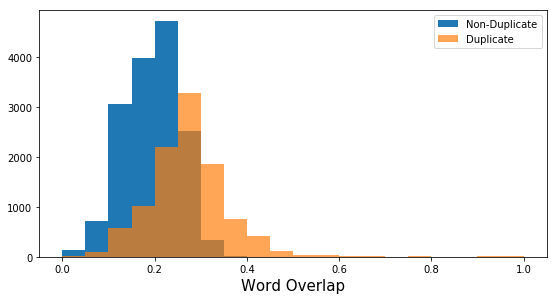

In [187]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.hist(asku_full['word_overlap'].loc[asku_full['is_duplicate'] == 0], range=[0,1], bins=20, label='Non-Duplicate')
plt.hist(asku_full['word_overlap'].loc[asku_full['is_duplicate'] == 1], range=[0,1], bins=20, alpha=0.7, label='Duplicate')
plt.legend()
# plt.title('Label distribution over word_overlap', fontsize=15)
plt.xlabel('Word Overlap', fontsize=15)
# plt.ylabel('Probability', fontsize=15)

In [171]:
full.dropna(inplace=True)

In [172]:
full['q1_lemma'] = full['question1'].apply(lemmatize_text)
full['q2_lemma'] = full['question2'].apply(lemmatize_text)
full['word_overlap'] = full.apply( word_match_share, axis=1, raw=True)

In [596]:
df_10k['q1_lemma'] = df_10k['question1'].apply(lemmatize_text)
df_10k['q2_lemma'] = df_10k['question2'].apply(lemmatize_text)
df_10k['word_overlap'] = df_10k.apply( word_match_share, axis=1, raw=True)
print(df_10k['word_overlap'].loc[df_10k['is_duplicate']==1].mean())
print(df_10k['word_overlap'].loc[df_10k['is_duplicate']==0].mean())
print(df_10k['word_overlap'].mean())

0.6481702948470702
0.45800973159630015
0.5270190000000069


In [597]:
df_50k['q1_lemma'] = df_50k['question1'].apply(lemmatize_text)
df_50k['q2_lemma'] = df_50k['question2'].apply(lemmatize_text)
df_50k['word_overlap'] = df_50k.apply( word_match_share, axis=1, raw=True)
print(df_50k['word_overlap'].loc[df_50k['is_duplicate']==1].mean())
print(df_50k['word_overlap'].loc[df_50k['is_duplicate']==0].mean())
print(df_50k['word_overlap'].mean())

0.6456169010964556
0.4602892743096754
0.5272221999999565


In [416]:
print(full['word_overlap'].loc[full['is_duplicate']==1].mean())
print(full['word_overlap'].loc[full['is_duplicate']==0].mean())

0.5683050052591557
0.3652969916557079


Text(0,0.5,'Number of pairs of questions')

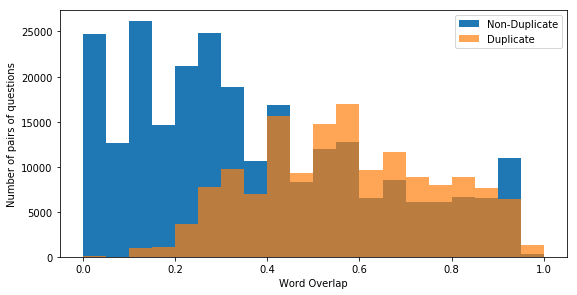

In [204]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.hist(full['word_overlap'].loc[full['is_duplicate'] == 0], range=[0,1], bins=20, label='Non-Duplicate')
plt.hist(full['word_overlap'].loc[full['is_duplicate'] == 1], range=[0,1], bins=20, alpha=0.7, label='Duplicate')
plt.legend()
# plt.title('Label distribution over word_overlap', fontsize=15)
plt.xlabel('Word Overlap', fontsize=10)
plt.ylabel('Number of pairs of questions', fontsize=10)

In [424]:
full[(full['word_overlap'] >= 0.9) & (full['word_overlap'] <= 0.95)].groupby('is_duplicate').count()

,id,qid1,qid2,question1,question2,q1_lemma,q2_lemma,word_overlap
is_duplicate,,,,,,,,
0,11004,11004,11004,11004,11004,11004,11004,11004
1,6431,6431,6431,6431,6431,6431,6431,6431


In [428]:
full[(full['word_overlap'] >= 0.9) & (full['word_overlap'] <= 0.95) & (full['is_duplicate'] == 0)]

,id,qid1,qid2,question1,question2,is_duplicate,q1_lemma,q2_lemma,word_overlap
14,14,29,30,"What are the laws to change your status from a student visa to a green card in the US,...",What are the laws to change your status from a student visa to a green card in the US?...,0,"[What, are, the, law, to, change, your, status, from, a, student, visa, to, a, green, ...","[What, are, the, law, to, change, your, status, from, a, student, visa, to, a, green, ...",0.91
25,25,51,52,What are some tips on making it through the job interview process at Medicines?,What are some tips on making it through the job interview process at Foundation Medicine?,0,"[What, are, some, tip, on, making, it, through, the, job, interview, process, at, Medi...","[What, are, some, tip, on, making, it, through, the, job, interview, process, at, Foun...",0.90
41,41,83,84,When can I expect my Cognizant confirmation mail?,When can I expect Cognizant confirmation mail?,0,"[When, can, I, expect, my, Cognizant, confirmation, mail?]","[When, can, I, expect, Cognizant, confirmation, mail?]",0.93
44,44,89,90,What universities does Rexnord recruit new grads from? What majors are they looking for?,What universities does B&G Foods recruit new grads from? What majors are they looking ...,0,"[What, university, doe, Rexnord, recruit, new, grad, from?, What, major, are, they, lo...","[What, university, doe, B&G, Foods, recruit, new, grad, from?, What, major, are, they,...",0.90
89,89,179,180,What is your review of The Next Warrior: Proving Grounds - Part 9?,What is your review of The Next Warrior: Proving Grounds - Part 5?,0,"[What, is, your, review, of, The, Next, Warrior:, Proving, Grounds, -, Part, 9?]","[What, is, your, review, of, The, Next, Warrior:, Proving, Grounds, -, Part, 5?]",0.92
145,145,291,292,Does Fab currently offer new employees stock options or RSUs?,Does Uber currently offer new employees stock options or RSUs?,0,"[Does, Fab, currently, offer, new, employee, stock, option, or, RSUs?]","[Does, Uber, currently, offer, new, employee, stock, option, or, RSUs?]",0.90
213,213,427,428,What are the disadvantages of listing a company in NSE?,What are the benefits of listing a company in NSE?,0,"[What, are, the, disadvantage, of, listing, a, company, in, NSE?]","[What, are, the, benefit, of, listing, a, company, in, NSE?]",0.90
232,232,465,466,"Where does the water from the Great Lakes come from, and how does these lakes wildlife...","Where does the water from the Great Lakes come from, and how does these lakes wildlife...",0,"[Where, doe, the, water, from, the, Great, Lakes, come, from,, and, how, doe, these, l...","[Where, doe, the, water, from, the, Great, Lakes, come, from,, and, how, doe, these, l...",0.94
290,290,580,581,What are the most interesting products and innovations that McDonald's is coming out w...,What are the most interesting products and innovations that Ball is coming out with in...,0,"[What, are, the, most, interesting, product, and, innovation, that, McDonald's, is, co...","[What, are, the, most, interesting, product, and, innovation, that, Ball, is, coming, ...",0.94
351,351,701,702,Harvard College Courses: What is general shopping advice for Turkish classes?,Harvard College Courses: What is general shopping advice for Tamil classes?,0,"[Harvard, College, Courses:, What, is, general, shopping, advice, for, Turkish, classes?]","[Harvard, College, Courses:, What, is, general, shopping, advice, for, Tamil, classes?]",0.91


In [247]:
full['word_overlap'].mean(), full['word_overlap'].std()

(0.4402476705904394, 0.2600673669417765)

In [228]:
questions= full['question1'].tolist() + full['question2'].tolist()
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(questions)
word_index = tokenizer.word_index
print("Words in index: %d" % len(word_index))

Words in index: 95595


mean-test 60.56 std-test 31.90 max-test 756.00


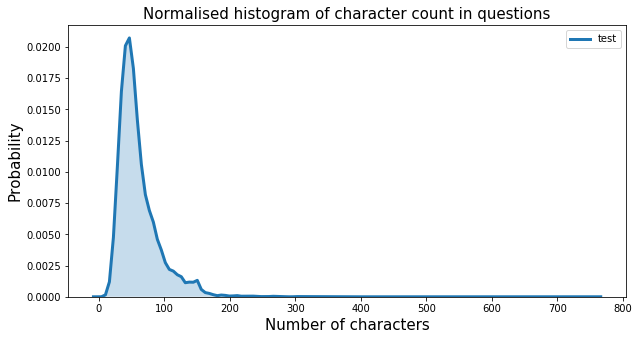

In [473]:
def character_count_hist(df):
    test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

    dist_test = test_qs.apply(len)
#     dist_test = dist_test[dist_test < 201]
    plt.figure(figsize=(10, 5))
    sns.distplot(dist_test, hist = False, kde = True, bins=200,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = 'test')
    plt.title('Normalised histogram of character count in questions', fontsize=15)
    plt.legend()
    plt.xlabel('Number of characters', fontsize=15)
    plt.ylabel('Probability', fontsize=15)

    print('mean-test {:.2f} std-test {:.2f} max-test {:.2f}'.format(dist_test.mean(), dist_test.std(), dist_test.max()))

character_count_hist(asku_full)

mean-test 11.06 std-test 5.89 max-test 237.00


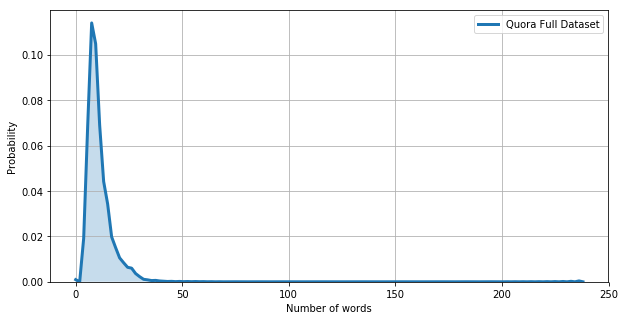

In [209]:
def word_count_hist(df):
    test_qs = pd.Series(df['question1'].tolist() + df['question2'].tolist()).astype(str)
    
    dist_test = test_qs.apply(lambda x: len(x.split(' ')))

    plt.figure(figsize=(10, 5))
#     dist_test = dist_test[dist_test < 100]
    sns.distplot(dist_test, hist = False, kde = True, bins=50,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label = 'Quora Full Dataset')
#     plt.title('Normalised histogram of word count in questions', fontsize=15)
    plt.legend()
    plt.xlabel('Number of words', fontsize=10)
    plt.ylabel('Probability', fontsize=10)
    plt.grid()

    print('mean-test {:.2f} std-test {:.2f} max-test {:.2f}'.format(dist_test.mean(), dist_test.std(), dist_test.max()))

word_count_hist(full)

In [34]:
def get_counts(data):
    test_qs = pd.Series(data['question1'].tolist() + data['question2'].tolist()).astype(str)

    qmarks = np.mean(test_qs.apply(lambda x: '?' in x))
    fullstop = np.mean(test_qs.apply(lambda x: '.' in x))
    equals = np.mean(test_qs.apply(lambda x: '=' in x))
    what = np.mean(test_qs.apply(lambda x: 'what' in x))
    how = np.mean(test_qs.apply(lambda x: 'how' in x))
    why = np.mean(test_qs.apply(lambda x: 'why' in x))
    who = np.mean(test_qs.apply(lambda x: 'who' in x))
    when = np.mean(test_qs.apply(lambda x: 'when' in x))
    capital_first = np.mean(test_qs.apply(lambda x: x[0].isupper()))
    capitals = np.mean(test_qs.apply(lambda x: max([y.isupper() for y in x])))
    numbers = np.mean(test_qs.apply(lambda x: max([y.isdigit() for y in x])))
    avgchar = np.mean(test_qs.apply(len))
    avgword = np.mean(test_qs.apply(lambda x: len(x.split(' '))))
    stopw = np.mean(test_qs.apply(lambda x: len([x for x in x.split() if x in stops])))

    print("Pairs of questions: {}".format(data[data.columns[0]].count()))
    print("Number of duplicates {}%".format(round(data[data.columns[0]].mean()*100, 2)))
    print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
    print('Questions with equals: {:.2f}%'.format(equals * 100))
    print('Questions with WHAT: {:.2f}%'.format(what * 100))
    print('Questions with HOW: {:.2f}%'.format(how * 100))
    print('Questions with WHY: {:.2f}%'.format(why * 100))
    print('Questions with WHO: {:.2f}%'.format(who * 100))
    print('Questions with WHEN: {:.2f}%'.format(when * 100))
    print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
    print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
    print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
    print('Questions with numbers: {:.2f}%'.format(numbers * 100))
    print('Average number of characters: {:.2f}'.format(avgchar))
    print('Average number of words: {:.2f}'.format(avgword))
    print('Average number of stopword: {:.2f} \n'.format(stopw))


# get_counts(full)
# get_counts(asku_full)
get_counts(ask_15k)
# get_counts(df_50k)

Pairs of questions: 15000
Number of duplicates 37.03%
Questions with question marks: 0.00%
Questions with equals: 1.19%
Questions with WHAT: 28.07%
Questions with HOW: 58.57%
Questions with WHY: 7.29%
Questions with WHO: 3.15%
Questions with WHEN: 35.27%
Questions with full stops: 55.13%
Questions with capitalised first letters: 0.00%
Questions with capital letters: 0.00%
Questions with numbers: 68.16%
Average number of characters: 483.88
Average number of words: 89.90
Average number of stopword: 42.16 



In [159]:
qs = pd.Series(full['question1'].tolist() + full['question2'].tolist()).astype(str)
what = np.mean(qs.apply(lambda x: 'what' in x))

In [161]:
qs.count()

808580

In [160]:
qs.nunique()

537361

In [162]:
(537361*100)/808580

66.45736970986174

In [550]:
full['word1'] = full['question1'].apply(lambda row: row.split(" ")[0])
full['word2'] = full['question2'].apply(lambda row: row.split(" ")[0])

asku_full['word1'] = asku_full['question1'].apply(lambda row: row.split(" ")[0])
asku_full['word2'] = asku_full['question2'].apply(lambda row: row.split(" ")[0])

In [567]:
# asku_full.groupby('word1').count().sort_values(by='qid')

In [150]:
full["question1"] = full['question1'].str.replace('[^\w\s]','')
full["question2"] = full['question2'].str.replace('[^\w\s]','')

In [140]:
asku_train["question1"] = asku_train['question1'].str.replace('[^\w\s]','')
asku_train["question2"] = asku_train['question2'].str.replace('[^\w\s]','')

In [149]:
full.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government stole the kohinoor kohinoor diamond back,0
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divided by 2423,0
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0


In [152]:
full[(full['question1'] == full['question2']) & (full['is_duplicate'] == 0)]

,id,qid1,qid2,question1,question2,is_duplicate
8054,8054,15713,15714,what is the difference between and in python,what is the difference between and in python,0
9746,9746,18927,18928,what is 00,what is 00,0
15875,15875,30290,30291,is the o blood group the universal donor or not,is the o blood group the universal donor or not,0
22242,22242,41777,41778,what is your review of nike,what is your review of nike,0
27947,27947,15713,51862,what is the difference between and in python,what is the difference between and in python,0
36796,36796,67055,67056,how do i write a simple code in c for sjf scheduling preemptive,how do i write a simple code in c for sjf scheduling preemptive,0
78271,78271,133495,133496,i am 17 now how can i earn my first house or lamborghini within 5 years one of my hobbies is animation if that matters,i am 17 now how can i earn my first house or lamborghini within 5 years one of my hobbies is animation if that matters,0
85054,85054,143683,13020,what are the functions of preprocessor directives in c,what are the functions of preprocessor directives in c,0
85668,85668,144591,48305,what does mean in c,what does mean in c,0
88816,88816,149325,149326,what does mean in java,what does mean in java,0


In [157]:
full[full['qid2'] ==528458]

,id,qid1,qid2,question1,question2,is_duplicate
395473,395473,528457,528458,"What is the answer to this ""IQ"" test question?",What is the answer to this IQ test question?,0


In [124]:
(537361*100)/808580

66.45736970986174

In [120]:
qs = pd.Series(full['question1'].tolist() + full['question2'].tolist()).astype(str)
print(qs.nunique())
print(qs.count())

537361
808580


In [126]:
print(full['question1'].nunique())
print(full['question2'].nunique())

290456
299174


In [128]:
290456+299174

589630

In [130]:
(537361*100)/589630

91.13528823160287

In [38]:
def read_full_dataset(file):

    print("Processing quora question pairs file")
    question1 = []
    question2 = []
    is_duplicate = []
    with open(file, encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            question1.append(row[1])
            question2.append(row[2])
            is_duplicate.append(row[0])
    print('Question pairs from %s: %d' % (file, len(question1)))

    return question1, question2, is_duplicate

In [39]:
def tokenize_data(question1, question2):
    questions = question1 + question2
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(questions)
    word_index = tokenizer.word_index
    print("Words in index: %d" % len(word_index))
    return word_index

In [109]:
questions = q1_train + q2_train
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(questions)
question1_word_sequences = tokenizer.texts_to_sequences(q1_train)
question2_word_sequences = tokenizer.texts_to_sequences(q2_train)

In [110]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
questions1 = []
for q in question1_word_sequences:
    question = []
    for w in q:
        question.append(reverse_word_map.get(w))
    questions1.append(" ".join(question))

questions2 = []
for q in question2_word_sequences:
    question = []
    for w in q:
        question.append(reverse_word_map.get(w))
    questions2.append(" ".join(question))

In [118]:
print(q1_train[30] + '\n')
print(questions1[30])

mouse disappears upon installing graphics cards this is the second time this has happened on two fresh installs ubuntu v13.10 amd64 these are the first and only lines of code it took to kill the mouse each time its still there shows and works on black screen during boot then pops up to top left corner then stops working its 5ea radeon 7850 and 2ea r9 280x cards 7 cards total on the same build obviously has something to do with it i have searched to no avail to find a way or example line of code to run to fix the proposed since you have all those cards another desktop is probably created and your mouse is floating around that one theory help is 100 appreciated

mouse disappears upon installing graphics cards this is the second time this has happened on two fresh installs ubuntu v13 10 amd64 these are the first and only lines of code it took to kill the mouse each time its still there shows and works on black screen during boot then pops up to top left corner then stops working its 5ea r

In [367]:
lengths = [len(i) for i in question1_word_sequences if len(i) <= 90]

# word in index:

- 10k sample: 15228
- 50k sample: 33848
- train     : 84598
- dev       : 14041
- test      : 14157

# null word embeddings GLOVE: 
- Word embeddings total: 2196016
- 10k sample: 775
- 50k sample: 3518
- train     : 16821
- dev       : 750
- test      : 717

# null word embeddings FAST_TEXT: 
- Word embeddings total: 999994
- 10k sample: 1524
- 50k sample: 6140
- train     : 26571
- dev       : 1391
- test      : 1318

In [97]:
# Create embedding index
def get_embeddings(embeddings):
    embeddings_index = {}
    if embeddings == 'glove':
        file = KERAS_DATASETS_DIR + GLOVE_FILE
    else:
        file = FASTTEXT_FILE

    with open(file, encoding='utf-8') as f:
        for line in f:
            values = line.split(' ')
            if len(values) > 2:
                word = values[0]
                if embeddings != 'glove':
                    embedding = np.asarray(values[1:], dtype='float32')
                else:
                    embedding = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = embedding

    print('Word embeddings: %d' % len(embeddings_index))
    return embeddings_index

# Prepare word embedding matrix
def get_embedding_matrix(embeddings_index, word_index):
    nb_words = min(MAX_NB_WORDS, len(word_index))
    word_embedding_matrix = np.zeros((nb_words + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
            if i > MAX_NB_WORDS:
                    continue
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                    word_embedding_matrix[i] = embedding_vector
            else:
                print(word)

    print('Null word embeddings: %d' % np.sum(np.sum(word_embedding_matrix, axis=1) == 0))
    return word_embedding_matrix, nb_words

In [98]:
glove_embeddings = get_embeddings('glove')
#fasttet_embeddings = get_embeddings('fast_text')

Word embeddings: 2196016


In [108]:
q1_train, q2_train, _ = read_full_dataset(ask_ubuntu_15)
# q1_dev, q2_dev, _ = read_full_dataset(dev)
# q1_test, q2_test, _ = read_full_dataset(test)
# q1 = q1_train + q1_dev + q1_test
# q2 = q2_train + q2_dev + q2_test

Processing quora question pairs file
Question pairs from samples/ask_15k.tsv: 15000


In [101]:
w_index = tokenize_data(q1_train,q2_train)

Words in index: 84598


In [102]:
word_embedding_matrix, nb_words = get_embedding_matrix(glove_embeddings, w_index)

kvpy
redmi
paytm
demonetisation
brexit
demonetize
quorans
demonetizing
cpec
oneplus
iisc
lyft
amcat
dangal
urjit
tomé
vishwanathan
zenfone
udemy
moocs
nsit
raghuram
elitmus
50ae
laravel
iitians
nmims
demonitization
iocl
duterte
srcc
upwork
zomato
duolingo
jallikattu
pichai
tqwl
afcat
xlri
1000rs
myntra
demonetise
iitian
topcoder
udacity
°c
shobhit
intjs
ckwl
taklamakan
unclos
venmo
sanriku
hotstar
chihuahuan
tensorflow
ranikhet
registan
nicmar
broglie
karakum
demonitizing
uberx
rlwl
d5200
jbims
kabali
chsl
qoura
demonetising
bhogle
iiser
rsus
codecademy
d3300
iitb
upes
hackerrank
nitie
ximb
chandrakar
coep
boruto
sibm
lnmiit
jayalalithaa
freecharge
dushka
xamarin
jeenkart
massachisetts
chromecast
josaa
kylo
atsume
codeforces
negan
pqwl
rs500
socialtrade
ayurvedically
raees
irnss
jinping
byju
nptel
vajiram
cph4
truecaller
codechef
pesit
jadavpur
rvce
500rs
kaufmich
tifr
proadvisor
taarak
⚪
rhaegar
undergraduation
eslands
1300d
spoj
gnwl
poké
kanhangad
crispr
snapchats
iiest
bahubali
kav

furuta
fonepad
branchwise
nanavati
datascience
patellectomy
biromantic
kejariwal
coenergy
eddard
ibeacon
redbus
bvucoep
testmysite
tratak
pgcfr
nhai
protisits
wistia
malampuzha
bh3
balachander
anonfiles
eu4
healthtap
形から入る
m335
codeathon
sergius
bahira
roggema
gangotri
afhq
srpk
yongnuo
nagini
collamer
patnitop
骂人
tarly
mpae
punchnama
baregama
phabricator
leninism
freepostcodelottery
p2090
kgmc
amperior
cubesmith
labé
govermnt
cosmog
cosmoem
tjhsst
agcl
madheshi
rapportive
bathua
safavid
1300ma
radiotelescopes
rgipt
i7559
bangaluru
fitbuyfollower
mqtt
cormen
quizup
bxxxx
indepandant
煥森
karkardooma
qwiki
carbonaro
lakshmikanth
axtria
scvngr
fatehgarh
ashwatthama
onega
rushcutters
mpharm
muoet
bajrangi
bhaijaan
makaut
sjf
jajpur
galgotia
thiruvambadi
essos
xchrisone
ccny
ticketswap
candere
sofawale
p1m
bournvita
whatsdog
chikkaballapur
truebass
icbms
sniardwi
也是醉了
iiitm
confucians
jesus2017
schutzstaffel
treutlen
kpit
travellingtrips
3 1
ifmr
cfbc
navrabeads
uwash
richfeel
justdial
garri

xiaosong
cr2025
jaats
anonyms
0xc000007b
weightt
koopsta
knicca
dianoetics
geant4
qutab
businessworks
note7
goldbach
dudhadhari
indravati
adderalls
baijal
canfy
conciousnes
zenphone
freedompop
teksystems
chumlee
jaoi
levera
waap
karnas
yasukuni
pgims
xombie
tienannita
chandrashtamam
veritaserum
z820
lapid
daksha
hl12
kopaja
metromini
barbaresco
a720is
ciwg
2n2222a
f2222a
pentadactyl
rupani
getche
walchand
contamined
meshach
abednego
asprise
narsingh
ਬ
ਬਰ
ਸ਼ੇਰ
susma
reacharge
akkineni
pashtunistan
sindhudesh
palk
kochava
rat518hud
raw511kud
bulgakov
aipgmee
d'astro
vtop
eveteasing
hvr1
3 3
sirpur
28am
pithoragrah
m553dn
warsan
chechik
kuzhi
gausian
gitanjali
zubkov
ऐहंकार
परदा
हटा
वह
प्रगट
जाता
oitnb
vderma
ryugyong
ncra
rauma
3000ead
vittel
sapiosexual
testcracker
90percentile
regrert
ramanand
hochschule
furtwangen
semiovale
350kv
brazuca
violances
272304
205248
modratr
pragramming
dc8
galápagos
diminisher
jhumla
gtaw
hadamard
dewo
bhawa
kalikho
einsten
placemens
xdating
liquefactive
c

bronzeville
jvoicexml
khojaly
whtsapp
ielt
shoethere
ch2so4
jwst
sanon
duodater
carcinogence
microloading
systemc
rafis
vpnbook
odiya
agrasen
microworkers
csrt
vrischika
testudaan
ndseg
afrotc
dalmia
aimpt
anchorfree
pinpinterest
pradhanmantri
milioti
130cc
lindelöf
打著民主反民主
heartmath
dogvacay
adhuri
photographyy
calithera
unadd
nagarik
lagani
hxy
comdata
raziman
timepassing
vtuplanet
karenjit
vohra
petg
jamabandi
chalukya
ikf
pachmarhi
siruvarmalar
arasan
xcent
arnavcreations
ddots
quoro
sagamihara
zambesi
ziptask
civfanatics
mapmyindia
petah
tiqwa
statolatry
jumaani
moviekareview
424344
tfws
fqt2
c3h6o3
baswan
meccans
spinko
akshardham
starthq
ezpopsy
yohe
rollwala
korr
kalf
openui5
nivin
wearhop
sharedtalk
indiabix
bankshares
goodrx
aryabhatta
festinger
mailgun
gulenist
utmspace
intenship
anumati
ijazat
engineerapplication
y510p
taslima
trustedinstaller
groopease
jiomusic
commandent
balchem
210t
throwns
telecomtube
noragami
fadia
cuidadito
traicionar
dcns
ovreseas
plotly
mamaself
exp

जवाब
दो
이정현
bangalorean
subjectwise
hypereutectoid
c4070
ofss
srib
mnist
barbarik
haribhakti
mywedding
65r14
tapiture
eileithyia
slager
bf4
rekapalli
25lacs
neet2016
h37
lagaya
saridon
umayyads
editage
∖
ldce
c9510
imagebrief
扣帽子
gottafeeling
fxkart
freedomain
devdutt
pattanaik
09987510597
anybuddy
cannaught
fastcharger
paranavigar
jarina
dhosi
aquilar
techhelium
抜け感
stopocock
individuval
exampes
flyboard
interculturation
emrcp
megharaj
macalester
adithya
neocell
traveln
moto3
sarvapally
sightness
leapure
kwench
committiee
rocketless
frakta
asgardians
amazonians
gasherbrum
sixthsense
qcr
kamshet
multibaggers
ios8
ss304
sus304
chizhou
improved0
latuda
roorkey
1rx16
12800s
verastem
uddhava
kyrat
snarvis
lakeer
fakeer
nevanlinna
4700th
bhubneshwar
megameters
catking
aikins
25000ft
fluentd
ln1
gërdec
dsena
ibooster
oxman
lamantia
fappening
condent
067972477x
mishri
shyama
raymarching
sjce
scheweser
cheguevera
hcverma
黎权锋
সহনাতিত
mastaan
collges
disanvantages
posttoself
kirorimal
nshss
anan

teeevo
codulis
orhvs
barelvi
subsects
dsce
codecollaborator
gogetto
79548
brotherels
endrose
fanspage
bahadhur
110kgs
megavenues
manderley
jelet
dysasthesia
browsec
mafed
bbr3
chinmaya
abdy
qrf
lattner
mobas
cardekho
3lks
dcuments
cs224d
cs224n
buckycubes
wildhorn
plantera
terreria
hgm
servicejoy
ab516tx
karanataka
disphosphorus
pentasulphide
p4s10
p2s5
marcerator
iisuperwomanii
yaweh
hypercondriac
mobiwiki
を
好き
beroe
defooing
sarvepelli
ideas2it
superglues
那年那兔那些事儿
nx8
nx9
kalabhras
wbw
mgcl
upneda
khelmart
protestng
puning
sargeathletics
abdaal
prulu
ramasetu
fym
darkon
olims
polipay
coderbunnyz
yudhishthira
faternal
kpopcollege
wallwt
microibiology
mccaleb
schizocarpic
sayhi
exone
bhaav
khaana
大吉大利
kundabuffer
startupnow
miyota
quackquack
10π
resultsource
kippee
constaint
thanoo
paramilltary
haikyuu
tokonami
senkan
izumitate
challana
conforim
bookeo
anthera
suryakanth
ustraa
automtotive
kaist
pmmc
statvoo
conflics
nyfa
blastars
servamp
demonsation
venkitaramanan
tmkoc
bachular
maina

tripoto
kabadiwalas
令
incubent
guhan
rojiblancos
tanduay
top7
vjit
munnjal
pharmaceuitical
celebarted
exsam
mobileye
arcamax
nrf17
018v4
karnel
justifythis
zposition
spacemarket
swaminathan
zentradi
lufax
maxivision
32002634
simcopter
indiabulls
aikau
fragmentpageradapter
1lak
rs15000
cmyb
prokerala
sarjana
6kv
ofsaa
omscs
uberpop
amazon421xs
elodin
anticholergenic
pgppro
lookaheads
antergos
apricity
typeracer
harrenhal
hscl
naraka
chaturdashi
myenglish
lévis
fieldfilter
vardy
payet
ayew
mahrez
12cubic
ofph6
aurenzeb
你说我说中文会不会有人看得懂
berkuliah
7house
ascenfant
intelcore
iodimetric
iodometric
appannie
similarweb
pitra
possibilism
shareslide
3 7
skylux
p680
nitroflare
allentab
jradiobutton
acds
fpso
dfg9rly
trupay
kejrival
pset4
ghati
janeo
dapps
guardium
nitis
mukhopadhyay
barkbox
kanggye
unenroll
kasinova
mechanicalengg
xslx
exaplain
logicical
admistion
egrail
oarp
oarpi
rasci
evluate
mainstreming
foozeball
100square
edubirdie
gyanam
mysuru
dgpa
paranoria
garhmukteshwar
riteg
mmmoffice
h

coinx
kinners
sequencefileinputformat
300vac
122600
fictfact
orangescrum
tugain
buddiest
vinge
miniaj
brewstation
47455e
somebodyyy
wetdog
reviewmycdr
smartvalu
gugaon
krennic
voiceferous
ahmadnagar
maxmise
isoxazolines
hdfbcover
futtu
p4317q
getwp
cropscience
docraptor
cremonensis
faciebat
electrcial
geckoos
recollapse
怀疑
dwnloadng
surperminis
digitaladvertisingalliance
organsiastion
darbouze
torquise
photocop
circumcentre
circumradius
regeneron
remero
digitalgrey
ayoo8tx
accurial
qinhuangdao
cntk
usd100mil
asssitant
dasheroo
quorean
maharshtra
i̇f
ilaya
thalapathy
bikroy
commonapp
annigeri
ramzor
cinthol
parrikar
bresser
meticously
connoor
webkul
improvemet
kalise
srimanthudu
hyperproteinemia
vocaless
lurm
消失了在我们身边
从我们身边消失了
leadquizzes
fatimid
bsvi
choudheri
instantq
helpx
irreversibilities
airbnbmultichat
junhyeok
bkorvhih7c8
keepassx
endosporic
anaïs
masterchefs
bergens
kulthum
primeng
lottoland
ekstop
biquinary
chitrangada
uniccos
tonalpohualli
zipf
voynich
clikcing
sewol
khyphosi

prettysecrets
shopsingh
jee2016
acuitus
firmino
challent
firefoxpatch
rolezinhos
thereptileclassifieds
修改狼
brainbuddy
hrishikesh
hirway
ferdowsi
mpmc
inddependence
nuwanda
cvts
manorath
ecnomical
darakaraka
makbuja
scofild
cosquillas
betonmarkets
shibam
fhv
sscw
kuznyechik
隐忍
bdof
jagjeet
rsnns
howking
memoring
matanuska
susitna
prolia
binaurial
jiuduidodo
rapo
digicard
etherium
crazyegg
padamati
ellitmus
bxb
encouaged
nokia105
uisearchcontroller
zephyrus
muktsari
chainalytics
jibrael
uov
eataly
drls
cloudcv
hyesan
gwdd
tnagar
cloakware
emem
dmem
zhangjiajie
elvisco
2b2t
hlpful
b6000
sharbati
bilsir
setuu
ocpc
bidthehacker
vvison
hechi
waveclues
shravana
shanivara
dismorphophobia
baupost
pigmentosus
osquery
benwfit
ch2cl2
bagalkot
honno
arakorai
acms
ghenghis
nobidding
avisae
pedestrianising
ctanujit
18500rs
giftcardmall
icelandics
radheshyam
staralliance
sininging
bitlicense
lawsky
pomco
quadi
granua
ziaur
begani
armsindustry
lmartin
coolkicks
shvartza
d7200
hulin
0x80073cf0
guduvanch

nexus2
standex
bhandana
pepperfry
armits
explorequotes
twotap
adhivakta
punchfork
9590907907
hyperworks
bpo2
ngse
coderpad
motog4
porur
daviet
itihasas
biofibre
soilids
phoritto
imporatnace
hindukush
mandaveli
teynampet
medanta
trehan
jankis
iaeste
springtrap
jelania
tromsø
acesip
rhomobile
kayasthas
frcp
一不做二不休
sabsa
choosx
nsitian
pfeffernüsse
mammaliaforme
pretham
mathex
ritsesh
abhigyan
ironkey
eclypt
athleanx
suryakanta
cpim
mytrustedwill
intelity
خواهش
میکنم
onlinesbi
tkink
concelling
nikefuel
mopti
gryphendor
quadripeds
multlibrand
chromoses
awadhe
wagonr
即将开奖
shekhawat
cs101
arveni
ietsist
desiar
526g
monginis
ebeneezer
kreatryx
kapsule
basilinna
kabaali
distancce
furinitue
medidata
35000rs
500kva
erriscon
compbook
excelance
miui8
100rs
higherstudies
jinyang
deactivat
andreass
nseit
repeatation
നേർകാഴ
ച
ചകൾ
sundarban
gangasagar
polymorpism
tiruchy
dimmesdale
s5282
screenhero
icoas
thorwald
bandishs
win8086
bosniak
majorian
ricimer
unclonable
ascl
deprssed
hles
lwhich
thuderbird

nusselt
fanbang
brelo
aumf
kadyrov
balarama
popatlal
techdata
etherum
p028tx
shakesperean
myine
movielens
portify
h1visa
whaatsappweb
techstartups
nazarwale
ibecome
dattatreya
homail
dominoz
aast
softpub
fukoka
cphq
kethamine
forinvestment
strebler
govnment
treknocom
fswp
şanlıurfa
fubo
ewrv85
parabrahman
dybala
adizs
heattech
epival
chamaeleonidae
paav
伤不起
barbado
cosmine
infoview
moridin
interrference
majie
ramsetu
incubes
rgukt
raulph
bestnaija
digyton
c5h13n
copc
44474
2150000
357000
martinere
uifn
undergrounded
lumbersexual
nna1
aliyun
salescrunch
goinstant
activejunky
puyi
mmsystem
8550g
anthrapology
bulkplaza
psychitrist
methedone
6lctc
lengshuijiang
anxietyl
possasive
songhai
zooloft
ebookee
smartypig
barod
iridum
neurosurgeries
sylethrin
organsystem
esql
sawstop
tieouts
buywithme
gurugaon
potys
放心
futuretimeline
makalidurga
dasra
shepeshef
usdoe
ambekar
crrc
karnatic
flybhp
mangalyan
pirateering
smartband
valliammai
wl18
नींव
xaro
समुपस्थितम्
pf5
kievan
helpouts
shuanghui
z356

honor5x
gionees6
24522591
ibadi
selfstudy
amensia
casbs
simarpreet
saluja
grenjar
mikandiwa
rgpit
ortivo
goldbeter
koshland
fall2017
nov28
yudhistra
intercatse
ointernet
masrat
conductometry
ishahi
aryabhata
lwir
iitsc
perigon
ms516
4mm7018
magha
ameeican
whitewave
hackernews
15ibd
dhaakad
aayan
harsi
dharmi
schmatic
samcro
dextop
zaarly
wl11
thymines
dogskin
zusak
cm11
sniplime
ae2
filelate
belgavi
sdslabs
chindwara
norfed
uora
quinby
portea
persuring
tdch
bipan
tweetstorm
wizzair
2745709
satthwa
kumada
bbnl
gamyu
vachi
arnim
auerstedt
51465
scamander
hydronitric
h2s4o8
skimlinks
xub
oganesson
atulya
inges
blumaan
hische
skybag
skybags
additioanally
μx
magnetons
elaboratively
redditceo
teacherspayteachers
androiddriver
aizwal
epam
bhatpara
planeret
hkbk
powress
airoter
parhlo
vmv
mi5s
rajasathan
乐赋唱随
zorpia
chawri
pacira
aromathérapy
109cc
jntuhmt
namotel
deflagrates
an225
danern
dataoutputstream
fileoutputstream
socho
olderwomendating
prgrmmng
dvlpmnt
wifislax
xt1068
peshawas
p8lite


salavat
uberjewellery
mijireh
q380
catchytopics
eeyup
ezhavas
recltd
itcz
kumagaya
sellenium
degagé
tripadvisior
budli
saleha
bitkan
persantage
webydo
palanisamy
excelville
μ0
4πa
savart
600x4000
装逼
pythonist
mqa
huaiwai
whrs
37whrs
潘迪華
adholiekhit
eaps
sfba
a76
pipiwai
alephti
mushiking
hireright
frac45
9apps
pubics
terrirorial
cateogary
jccsf
dealsnshops
pardah
sportsstsr
waymakes
ashgabat
benzodiazepenes
viit
kaigi
kakamami
md101
mgf2hn
duang
danceformed
karnatak
1amu
sriniwas
ungy
asgutosh
t250si
c2h2
latinic
ofcumulative
morgorth
azzedine
luckas
psct
ayurwin
ramaiya
contects
36kv
s7572
utts
iprof
fashism
sscportal
donnan
garrotes
sukhadeo
lancehead
queimada
312211
13112221
howforefingers
diosdado
mohammedia
greymeter
polands
hukumat
与人方便
与己方便
lambdadelta
bernkastel
fluenty
toptvshows
sanfilippo
biratnagar
monkeytalk
baalgopal
thewebdevpolls
mastrabutation
有緣無份
umaria
katni
gannt
jurnol
teepeeing
gandhis
08888888888
ㅐㅌㄴㄴㅇ
davu
vacis
tandel
atibs
ppap
certapet
baraq
protegent
parash

In [ ]:
word_embedding_matrix, nb_words = get_embedding_matrix(glove_embeddings, w_index)